In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import matplotlib.pyplot as plt

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# prepare dataset
train_dir = "/root/workspace/DeepLearning/ConvNet/datasets/cats_and_dogs_small/train"
validation_dir = "/root/workspace/DeepLearning/ConvNet/datasets/cats_and_dogs_small/validation"
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print("batch data size:", data_batch.shape)
    print("batch label size:", labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
batch data size: (20, 150, 150, 3)
batch label size: (20,)


In [4]:
# generate a model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 10s 84ms/step - loss: 0.6998 - acc: 0.5198 - val_loss: 0.6735 - val_acc: 0.6030
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6712 - acc: 0.5825 - val_loss: 0.6356 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6092 - acc: 0.6685 - val_loss: 0.6671 - val_acc: 0.5900
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5715 - acc: 0.6973 - val_loss: 0.6377 - val_acc: 0.6460
Epoch 5/30
100/100 [==============================] - 8s 81ms/step - loss: 0.5355 - acc: 0.7342 - val_loss: 0.5932 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 8s 81ms/step - loss: 0.4946 - acc: 0.7531 - val_loss: 0.5669 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 8s 80ms/step - loss: 0.4747 - acc: 0.7700 - val_loss: 0.5939 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 8s 80ms/step -

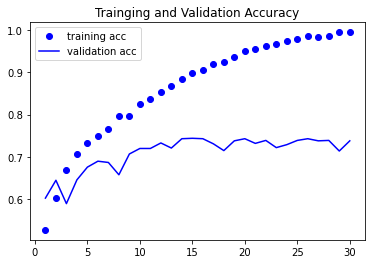

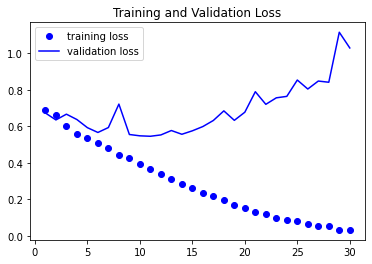

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Trainging and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()